In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error, median_absolute_error, RocCurveDisplay, roc_curve, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier

In [195]:
cancerData = load_breast_cancer()
y = cancerData.target
X = cancerData.data

569
357


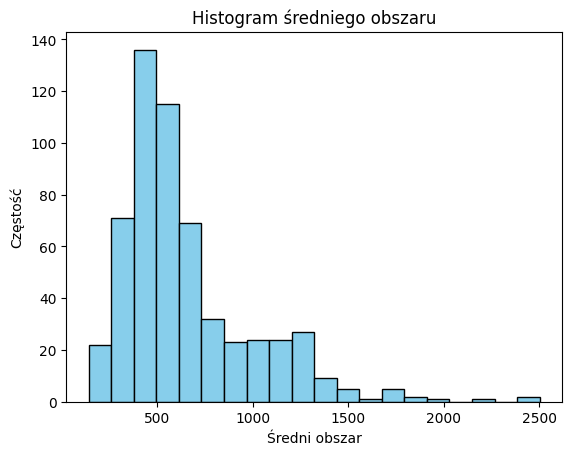

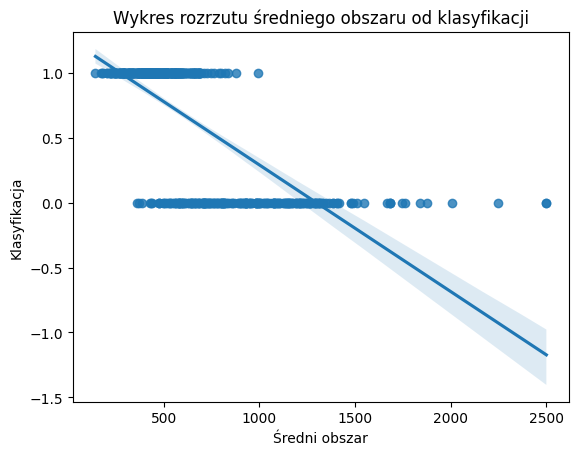

In [196]:
#1. Sprawdz liczbe wszysktich przypadków
print(cancerData.data.shape[0])
#2. Sprawdz liczbe przypadkow raka zlosliwego
print(y.sum())
#3 Narysuj historgram sredniego obszaru
mean_area = X[:,cancerData.feature_names.tolist().index('mean area')]
plt.hist(mean_area, bins=20, color='skyblue', edgecolor='black')

# Dodaj tytuł i etykiety osi
plt.title('Histogram średniego obszaru')
plt.xlabel('Średni obszar')
plt.ylabel('Częstość')

# Pokaż wykres
plt.show()

#4 Narysuj wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji (użyj sns.regplot)
sns.regplot(x=mean_area, y=y)
plt.title('Wykres rozrzutu średniego obszaru od klasyfikacji')
plt.xlabel('Średni obszar')
plt.ylabel('Klasyfikacja')

# Pokaż wykres
plt.show()

In [197]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [198]:
#Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 398
Rozmiar zbioru testowego: 171


In [199]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

#Zmiana thresholdu z bazodwego 0,5 na 0,2
y_predicated_probability = model.predict_proba(X_test)[:, 1]
y_pred_class = [1 if prob > 0.2 else 0 for prob in y_predicated_probability]

print(model.predict(X_test))
print(model.predict_proba(X_test))

#definicja przewidywanych Y (używane później)
y_predicted = model.predict(X_test)

print(y_predicted)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
[[1.19411865e-01 8.80588135e-01]
 [9.99985481e-01 1.45190673e-05]
 [9.96530931e-01 3.46906858e-03]
 [5.60551400e-04 9.99439449e-01]
 [8.83031478e-05 9.99911697e-01]
 [1.00000000e+00 2.61635730e-10]
 [9.99999996e-01 4.02878948e-09]
 [9.57845803e-01 4.21541971e-02]
 [4.06047396e-01 5.93952604e-01]
 [7.17416370e-04 9.99282584e-01]
 [5.21770509e-02 9.47822949e-01]
 [9.85847432e-01 1.41525677e-02]
 [6.58389023e-03 9.93416110e-01]
 [8.35534549e-01 1.64465451e-01]
 [2.15366411e-03 9.97846336e-01]
 [9.98315023e-01 1.68497680e-03]
 [2.18276613e-03 9.97817234e-01]
 [1.12518286e-05 9.99988748e-01]
 [7.96661334e-07 9.99999203e-01]
 [9.99998137e-01 1.863392

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



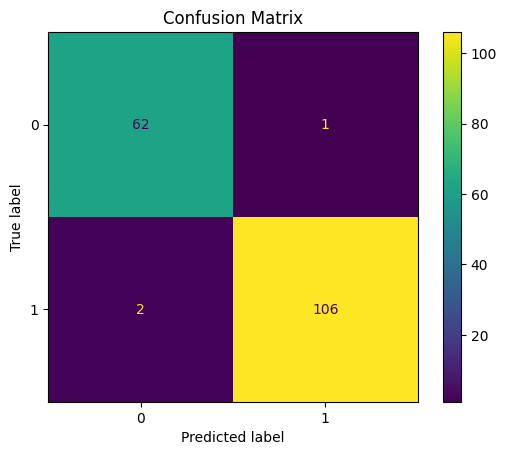

In [200]:
conf_matrix = confusion_matrix(y_test, y_predicted)
# Narysuj Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot()
print(classification_report(y_test, y_predicted))

plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.97      1.00      0.99       108

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



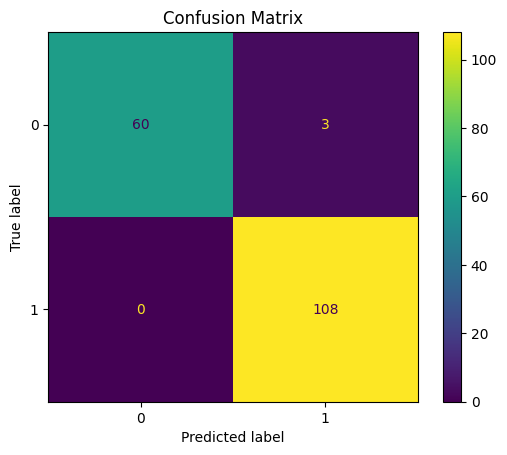

In [201]:
conf_matrix = confusion_matrix(y_test, y_pred_class)

#Confusion Matrix po zmianie parametru thresholdu
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot()
print(classification_report(y_test, y_pred_class))

plt.title('Confusion Matrix')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


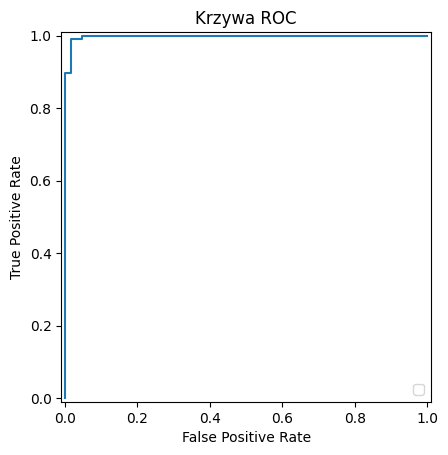

In [202]:
# Obliczenie krzywej ROC
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Wyświetlenie krzywej ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Krzywa ROC')
plt.show()

In [203]:
# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.97      1.00      0.99       108

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



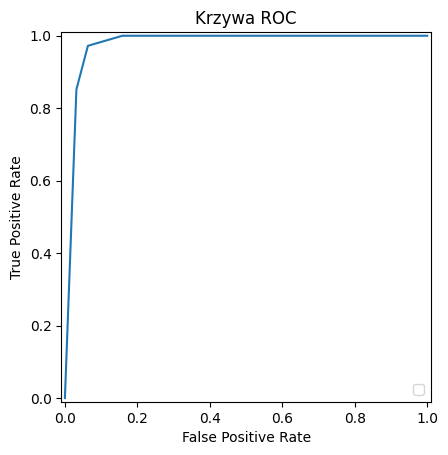

In [204]:
# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(classification_report(y_test, y_pred_class))

# Wyświetlenie krzywej ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Krzywa ROC')
plt.show()